In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [96]:
# f,neff(real),neff(imag),loss,beta(real),beta(imag),overlap,vg,D
with open("waveguide_350um_neff.txt", "r", encoding="utf-8") as file:
    next(file)
    columns = [[float(value) for value in line.strip().split(",")[:3]] for line in file]
f, n_eff_re, n_eff_im = zip(*columns)

In [97]:
print(n_eff_re)

(2.494024488266, 2.489275145629, 2.484501251867, 2.47970262685, 2.474879090582, 2.47003046328, 2.465156565388, 2.46025721775, 2.455332241545, 2.450381458579, 2.445404691253, 2.440401762731, 2.435372496983, 2.430316718967, 2.425234254656, 2.420124931324, 2.414988577498, 2.409825023179, 2.404634100041, 2.399415641462)


In [105]:
print(f[0])
print((c / f[0]) *  10**6)

236057053543300.0
1.270000000000038


In [36]:
# convert frequency [hz] to wavelength [um]
c = 299792458
lam = [c/freq*10**6 for freq in f]

In [41]:
lambda_0 = 1.31
x_fit = [l - lambda_0 for l in lam]
y_fit = n_eff_re
n_fit = 2

n_2, n_1, n_0 = np.polyfit(x_fit, y_fit, n_fit)
def model_n_eff(l):
    return n_0 + n_1*(l - lambda_0) + n_2*(l - lambda_0)**2

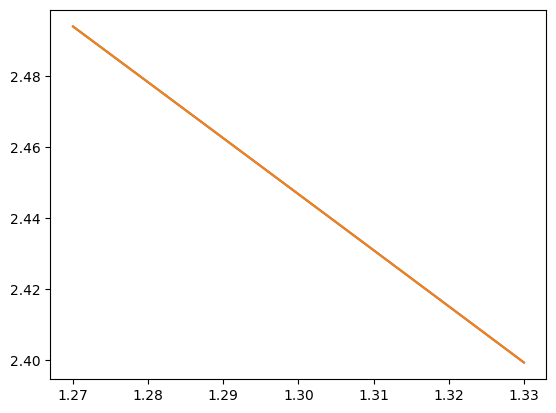

In [109]:
plt.plot(lam, [model_n_eff(l) for l in lam])
plt.plot(lam, n_eff_re)

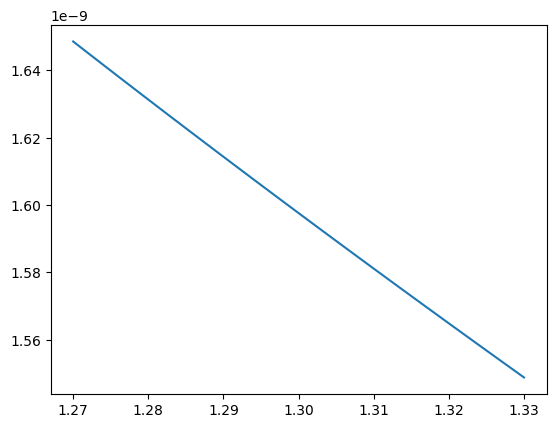

In [84]:
plt.plot(lam, n_eff_im)

In [125]:
def mzi_transfer(dl, l):
    beta = 2*np.pi*(model_n_eff(l))/l
    return (1 / 4) * abs(1+np.e**(-(1j)*beta*dl))**2

def mzi_transfer_db(dl, l):
    return 10*np.log10(mzi_transfer(dl, l))

In [132]:
x = np.linspace(1.309, 1.311, 500)
y = mzi_transfer_db(2666, x)
peaks, _ = find_peaks(y, -10)
fsr_array = np.diff([x[i] for i in peaks])
print(fsr_array)
fsr = np.average(fsr_array)
print(fsr)

[0.00014028 0.00014429 0.00014429 0.00014028 0.00014429 0.00014429
 0.00014028 0.00014429 0.00014429 0.00014429 0.00014028 0.00014429
 0.00014429]
0.0001430553414521431


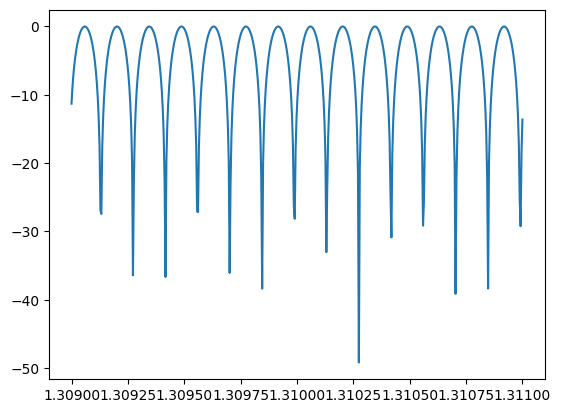

In [133]:
plt.plot(x, y)
#plt.xlim(1.309,1.311)

In [130]:
print(c / (4.5 * 2666 * 10**-6)) * 

24988952071.351173
